<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/perceptron_to_compare_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Risulati perceptron implementato con scikit
pesi scikt [[-0.5        -0.29850122  0.35054929]]
accuracy scikt = 1.0
m= 0.8515242537314037 q= 1.4263329371770628
pesi a= -0.2985012235 b= 0.3505492910999999 c= -0.5


Risulati perceptron implementato in python
parametri usati: speed= 0.1 epoche 50
coefficienti finali : -0.5 -0.2985012235 0.3505492910999999
accuracy  python = 1.0


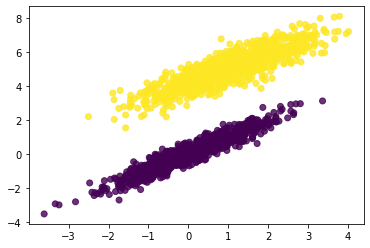

In [0]:

''' Perceptron implementato in mood nativo con python: il dataset è pubblico:
https://raw.githubusercontent.com/dataoptimal/posts/master/algorithms%20from%20scratch/dataset.csv

Un altro dataset è una retta f(x)=0.5x + 10 (m=0.5 e q=10)
il dataset è:
per usare uno o l'altro dataset basta commentare le righe del dataset non usato

'''

##############################################
import random
import pandas as pd
from random import seed
from random import randrange
from csv import reader
from math import sqrt,exp
import matplotlib.pyplot as plt
import numpy as np

# dataset pubblico##############
#CSV_url='https://raw.githubusercontent.com/dataoptimal/posts/master/algorithms%20from%20scratch/dataset.csv'
#############
# dataset mio retta ##############
CSV_url='https://raw.githubusercontent.com/stefanoridolfi/Coding_ML/master/dataset_retta.csv'
#############

df=pd.read_csv(CSV_url)

# dataset pubblico ##############
#plt.scatter(df.values[:,1], df.values[:,2], c = df['3'], alpha=0.8) # [:,1] significa tutte le righe e le la colonna 1 (che è la seconda)
# dataset pubblico ##############

# dataset mio retta ##############
plt.scatter(df.values[:,1], df.values[:,2], c = df['class'], alpha=0.8) # [:,1] significa tutte le righe e le la colonna 1 (che è la seconda)
# dataset mio retta ##############


#print("originale\n",df[0:3]) # 0:3 è l'intervallo delle righe
df = df.values
#print("values\n",df[0:3])

#df1=df[:, 0:3]
#print("df1",df1)
np.random.seed(5)
np.random.shuffle(df)
train = df[0:int(0.7*len(df))]
test = df[int(0.7*len(df)):int(len(df))]

x_train = train[:, 0:3] # [:, 0:3] significa tutte le righe e le colonne dalla 0 (che è la prima) alla 3 
y_train = train[:, 3] # [:, 3] significa tutte le righe e la colonne 3 (che è la colonna della classificazione, l'output) 

x_test = test[:, 0:3]
y_test = test[:, 3]


from sklearn.linear_model import Perceptron

# training the sklearn Perceptron
clf = Perceptron(random_state=None, eta0=0.1, shuffle=False, fit_intercept=False)
clf.fit(x_train, y_train)
Perceptron()
y_predict = clf.predict(x_test)


print("Risulati perceptron implementato con scikit")
print("pesi scikt",clf.coef_)
from sklearn.metrics import accuracy_score
print ("accuracy scikt =", accuracy_score(y_test, y_predict))
c=clf.coef_[0][0]
a=clf.coef_[0][1]
b=clf.coef_[0][2]
m=-a/float(b)
q=-c/b
print("m=",m,"q=",q)
print("pesi","a=",a,"b=",b,"c=",c)

######################## percpetron manuale in Python ####################
######################################################

# Activation function per dataset  pubblico
'''def activate(num):
  if num >= 0:
    return 1
  else:
   return 0      
'''
# Activation function per dataset  mio retta
def activate(num):
  if num >= 0:
    return 1
  else:
   return -1    

# genero pesi
weights = []
weights_start = []
# for x in range(0, 3):
 # weights.append(random.random()*2-1)
  #weights_start.append(weights[x])
for i in range(0,3):
  weights.append(0.0)


x_train_list=x_train.tolist()
y_train_list=y_train.tolist()
x_test_list=x_test.tolist()
y_test_list=y_test.tolist()
y_test_list_new=list()
for k in range(0,len(y_test_list)):
  y_test_list_new.append(int(y_test_list[k]))

it=50
speed=0.1

# Inizio training per calcolare i coefficienti, i pesi
for i in range(0,it+1):
            errTot = 0 # Il conteggio degli errori riparte da zero in ogni iterazione
            for j in range(0, len(x_train_list)):
                
                x0 = x_train_list[j][0]
                x1 = x_train_list[j][1]
                x2 = x_train_list[j][2]
                inputs=[x0,x1,x2]
                
                desired_output=int(y_train_list[j])
                
                
                # classe di apparteneza del punto,mettere valore in quarta posizione della lista
                # Chiamiamo la funzione di back propagation e incrementiamo il conteggio errori
                sum = 0
                for k in range(0, len(weights)):
                  sum += weights[k] * inputs[k]
        
                guess = activate(sum)   # Calcolo il valore di output relativo agli input forniti
                error = desired_output - guess      # Calcolo l'errore come differenza tra valore in output e valore atteso
                
                # La correzione dei pesi avviene secondo la formula
                # peso = peso + errore*valore_input*learn_speed
                # se l'errore è pari a zero la formula non altera il valore del peso
                for k in range(0, len(weights)):
                  weights[k] += error*inputs[k]*speed
                #print("Addestramento in corso, m, q  :",-self.weights[0]/self.weights[1],-self.weights[2]/self.weights[1] )
                # Restituiamo 0 se la previsione è stata corretta, 1 altrimenti
                # questo dato servirà più avanti per conteggiare gli errori durante il processo di apprendimento
                if error != 0:
                   errTot+=1
           #print("epoca", i, "Errori=",errTot)
                
            # Al termine del sottociclo di punti visualizziamo il valore del contatore errori
            #print("Iterazione:",i,"Errori:",errTot)
#print("Errori %=",(errTot/n)*100)
#print("\n\nParametri iniziali a, b , c della retta (ovvero i pesi generati casualmennte) :",weights_start )
print("\n\nRisulati perceptron implementato in python")
print("parametri usati:","speed=",speed, "epoche",it)
print("coefficienti finali :",weights[0], weights[1], weights[2])
c=clf.coef_[0][0]
a=clf.coef_[0][1]
b=clf.coef_[0][2]
m=-a/float(b)
q=-c/b
print("m=",m,"q=",q)
print("pesi","a=",a,"b=",b,"c=",c)
# Inizio test ##################
corretced=0
y_predict_python=list()
sum_list=list()
for k in range(0,len(x_test_list)):
  sum=0
  for h in range(0, len(weights)):
    sum += weights[h] * x_test_list[k][h]
  y_predict_python.append(activate(sum))

for k in range(0,len(y_test_list)):
  if y_test_list[k]== y_predict_python[k]:
    corretced+=1
print ("accuracy  python =", corretced/float(len( y_test)))


